# Chess Game Dataset (Lichess)

# Dataset Preprocessing

Dataset analysis and preprocessing

1. Data lineage: Chess Game Dataset (Lichess) from Kaggle.

   Link to dataset: https://www.kaggle.com/datasets/datasnaek/chess

2. Goal: To analysis and preprocess the dataset of 20,000+ games from lichess website for training the ML Model

3. Result: Preprocessed Chess game dataset for Machine Learning model training

# 1] Import Section

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns


# 2] Data Load

In [2]:
dataset_path = r'.\dataset\lichess.org games.csv'
df = pd.read_csv(dataset_path)

# 3] Examining and Preprocessing the Data

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

The first task is to transform some variables containing non-numerical values into numerical ones. In the end we want to throw this data into UMAP model which understands integers and floats only.

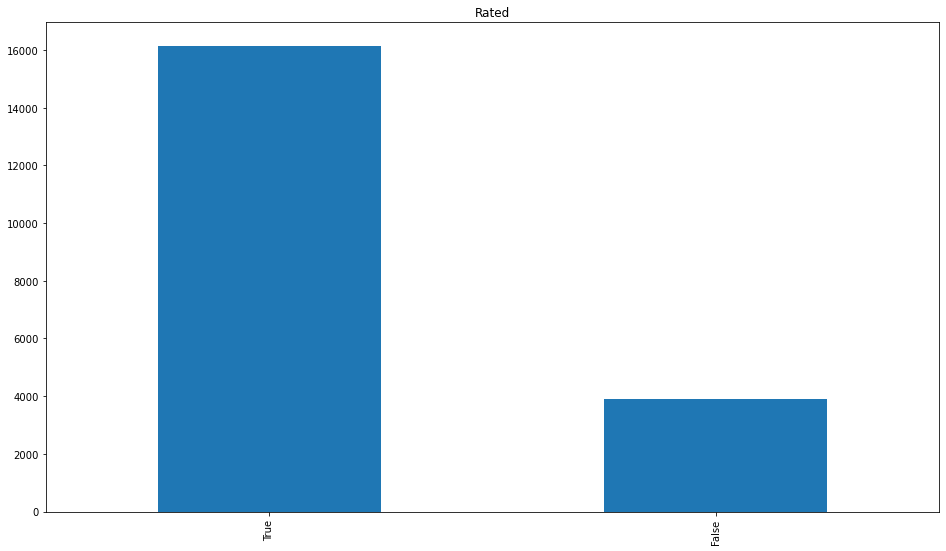

In [7]:
plt.figure(figsize = (16,9))
df['rated'].value_counts().plot(kind='bar', title='Rated')
plt.savefig(r'.\plots\rated.png')
plt.show()

In [8]:
#Column = 'rated'
# True = 1   False = 0
df['rated'] = [1 if x == True else 0 for x in df['rated']]

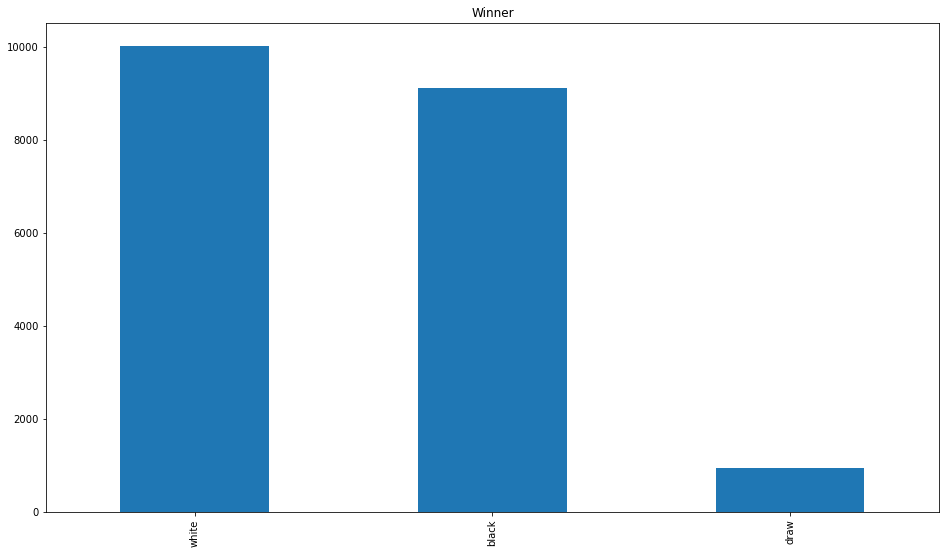

In [9]:
plt.figure(figsize = (16,9))
df['winner'].value_counts().plot(kind='bar', title='Winner')
plt.savefig(r'.\plots\winner.png')
plt.show()

In [10]:
#df = df[df['winner'] != 'draw']

In [11]:
#Column = 'winner'
# 'white' = 1   'black' = 0  'draw' = 0
df['winner'] = [1 if x == 'white' else 0 for x in df['winner']]

One Hot encoding of 'victory_status' categorial column

In [12]:
df['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [13]:
df['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

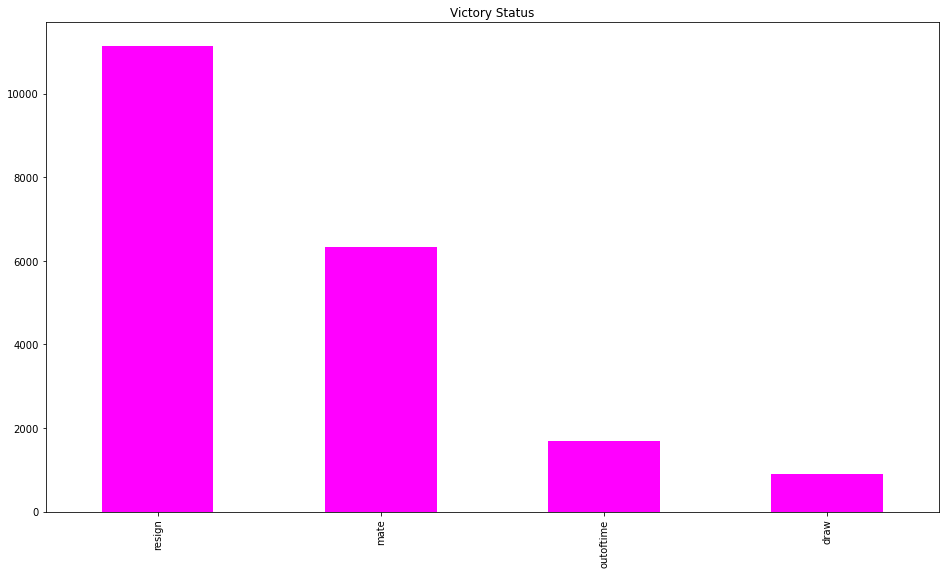

In [14]:
plt.figure(figsize = (16,9))
df['victory_status'].value_counts().plot(kind='bar', title='Victory Status', color='magenta')
plt.savefig(r'.\plots\victory_status.png')
plt.show()

In [15]:
df = pd.get_dummies(df, columns = ['victory_status'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20058 non-null  object 
 1   rated                     20058 non-null  int64  
 2   created_at                20058 non-null  float64
 3   last_move_at              20058 non-null  float64
 4   turns                     20058 non-null  int64  
 5   winner                    20058 non-null  int64  
 6   increment_code            20058 non-null  object 
 7   white_id                  20058 non-null  object 
 8   white_rating              20058 non-null  int64  
 9   black_id                  20058 non-null  object 
 10  black_rating              20058 non-null  int64  
 11  moves                     20058 non-null  object 
 12  opening_eco               20058 non-null  object 
 13  opening_name              20058 non-null  object 
 14  openin

Turns column

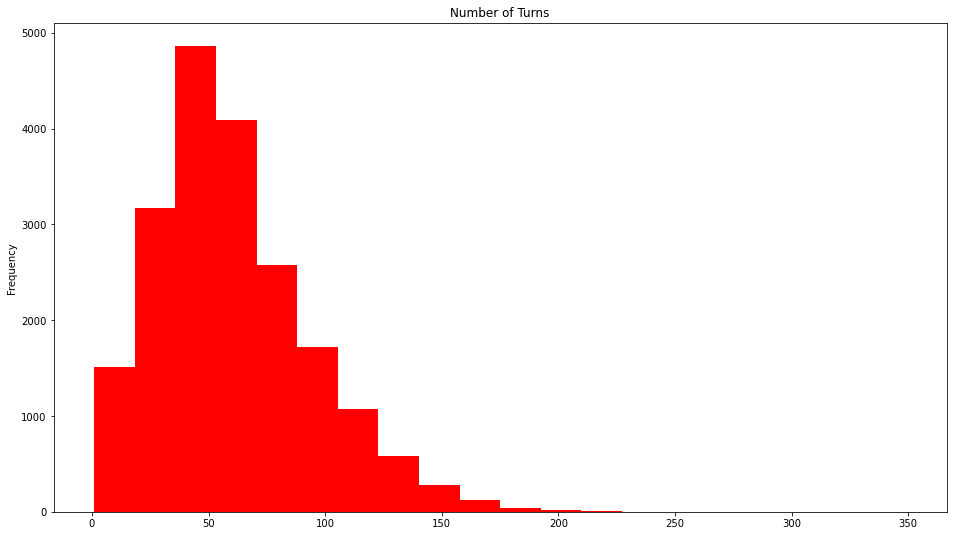

In [17]:
plt.figure(figsize = (16,9))
df['turns'].plot(kind='hist',bins=20, title='Number of Turns', color='red')
plt.savefig(r'.\plots\turns.png')
plt.show()

In [18]:
df['turns'].describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

Rating Difference

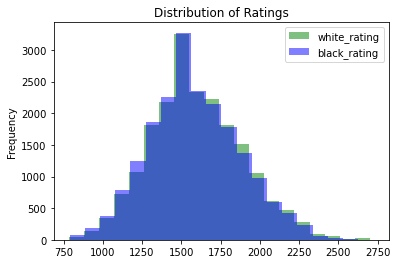

In [19]:
df['white_rating'].plot(kind='hist',alpha=0.5, color='green', bins=20, title='Distribution of Ratings')
df['black_rating'].plot(kind='hist',alpha=0.5, color='blue',bins=20)
plt.legend()
plt.show()

In [20]:
df['rating_diff_wrt_white'] = df['white_rating']-df['black_rating']

In [21]:
df.head()

,id,rated,created_at,last_move_at,turns,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,rating_diff_wrt_white
0,TZJHLljE,0,1.504210e+12,1.504210e+12,13,1,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,0,1,0,309
1,l1NXvwaE,1,1.504130e+12,1.504130e+12,16,0,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0,0,0,1,61
2,mIICvQHh,1,1.504130e+12,1.504130e+12,61,1,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0,1,0,0,-4
3,kWKvrqYL,1,1.504110e+12,1.504110e+12,61,1,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0,1,0,0,-15
4,9tXo1AUZ,1,1.504030e+12,1.504030e+12,95,1,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,1,0,0,54


Drop few columns having zero impact on predictions

In [22]:
cols_to_drop = ['id', 'white_id', 'black_id', 'created_at', 'last_move_at', 'white_rating', 'black_rating', 'increment_code', 'opening_name', 'opening_eco', 'moves']

In [23]:
df.drop(columns = cols_to_drop, inplace = True, axis= 1)

In [24]:
df.head()

,rated,turns,winner,opening_ply,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,rating_diff_wrt_white
0,0,13,1,5,0,0,1,0,309
1,1,16,0,4,0,0,0,1,61
2,1,61,1,3,0,1,0,0,-4
3,1,61,1,3,0,1,0,0,-15
4,1,95,1,5,0,1,0,0,54


# 4] Saving the Preprocessed Data

In [25]:
df = df.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rated                     20058 non-null  float64
 1   turns                     20058 non-null  float64
 2   winner                    20058 non-null  float64
 3   opening_ply               20058 non-null  float64
 4   victory_status_draw       20058 non-null  float64
 5   victory_status_mate       20058 non-null  float64
 6   victory_status_outoftime  20058 non-null  float64
 7   victory_status_resign     20058 non-null  float64
 8   rating_diff_wrt_white     20058 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [27]:
df.to_csv(r'C:\Users\Mudar Hussain\Documents\Chess Winner Prediction\dataset\Preprocessed_chess_dataset.csv', index = False)